# Visual Weather Systems

## Contents:
##### 1. Importing libraries and data
##### 2. Pre-processing weather images
##### 3. Compiling and running the model
##### 4. Results
##### 5. Bonus task

### 1. Importing libraries and data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [3]:
#download the weather images and put them in a directory
path = r'C:\Users\lisad\OneDrive\Homework\Machine Learning with Python\Achievement 2\Data Sets\Multi-class Weather Dataset'
folders = os.listdir(path)
print(folders)

['Cloudy', 'Rain', 'Shine', 'Sunrise']


### 2. Pre-processing weather images

In [4]:
#this will load in the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [5]:
#this is a CNN to categorize the weather images

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(0.5, seed = 5)(x)
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

### 3. Compiling and running the model

In [17]:
#compile and run the model
#how many epochs are required to generate an accurate model?

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 20, #<----FILL THIS IN!
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size,
)

Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 410ms/step - accuracy: 0.9689 - loss: 0.0136 - val_accuracy: 0.8705 - val_loss: 0.0578
Epoch 2/20
 1/28 ━━━━━━━━━━━━━━━━━━━━ 6s 257ms/step - accuracy: 1.0000 - loss: 0.0019

C:\Users\lisad\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 0.8750 - val_loss: 0.0545
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 364ms/step - accuracy: 0.9873 - loss: 0.0055 - val_accuracy: 0.8884 - val_loss: 0.0563
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 1.0000 - loss: 8.1238e-05 - val_accuracy: 0.8795 - val_loss: 0.0567
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 367ms/step - accuracy: 0.9942 - loss: 0.0026 - val_accuracy: 0.8616 - val_loss: 0.0638
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.9375 - loss: 0.0310 - val_accuracy: 0.8661 - val_loss: 0.0634
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 370ms/step - accuracy: 0.9701 - loss: 0.0134 - val_accuracy: 0.8438 - val_loss: 0.0686
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 1.0000 - loss: 1.5891e-04 - val_accuracy: 0.8527 - val_loss: 0.0663
Epoch 9/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 381ms/step - accuracy: 0.9632 - loss: 0.0163 - val_accuracy: 0.883

### 4. Results

In [18]:
results = pd.DataFrame(model.history.history)

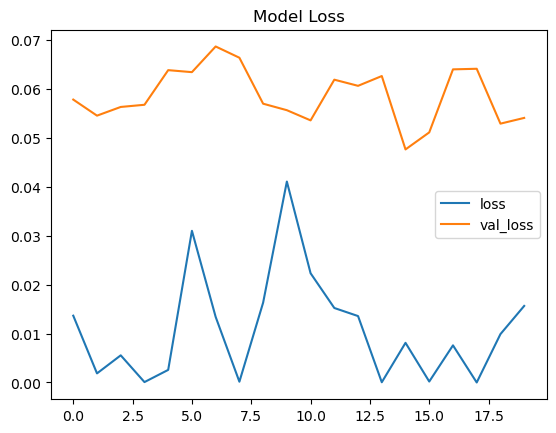

In [19]:
results[['loss','val_loss']].plot(title='Model Loss')
plt.savefig('./loss.png')

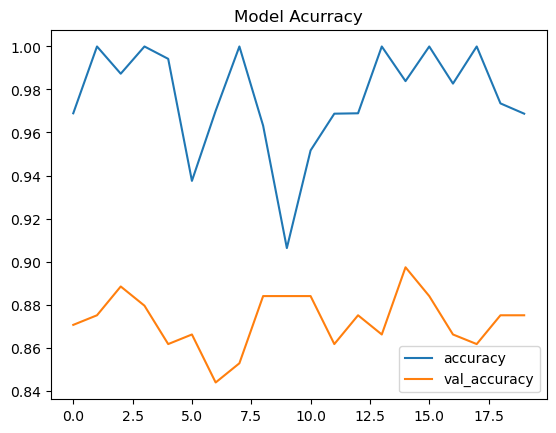

In [20]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy')
plt.savefig('./accuracy.png')

In [21]:
# Print the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 0.96875, Val_Accuracy: 0.875
Loss: 0.015634596347808838, Val_Loss: 0.05403637886047363


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step


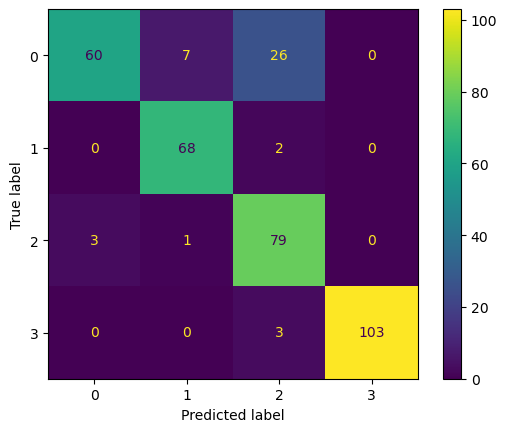

In [22]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 10 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [23]:
#This function will display a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


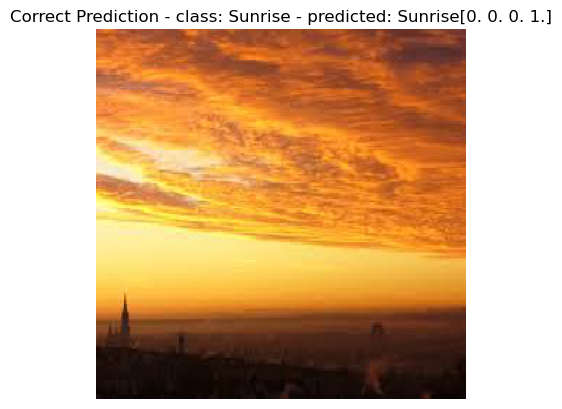

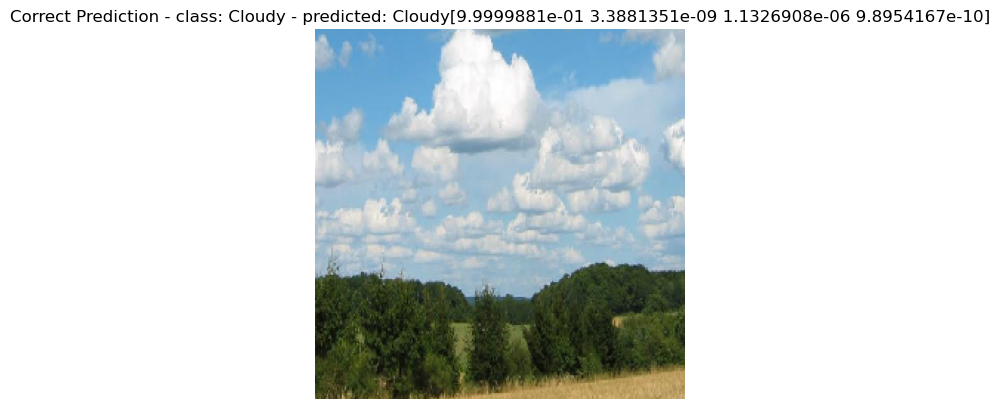

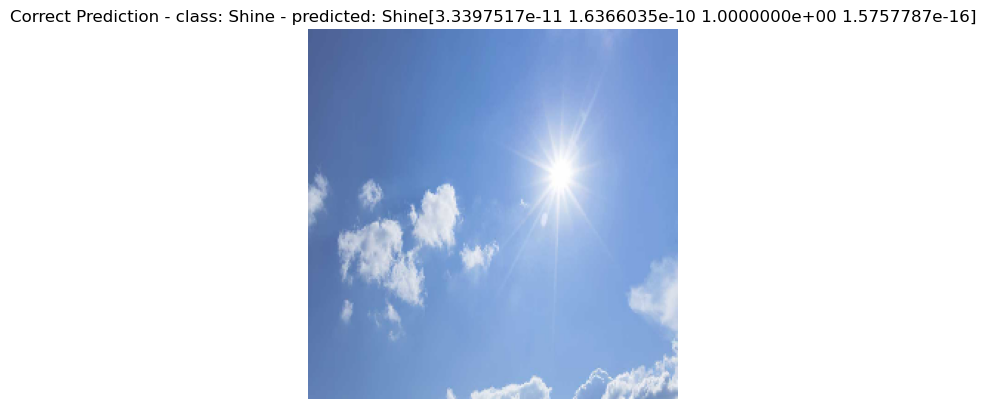

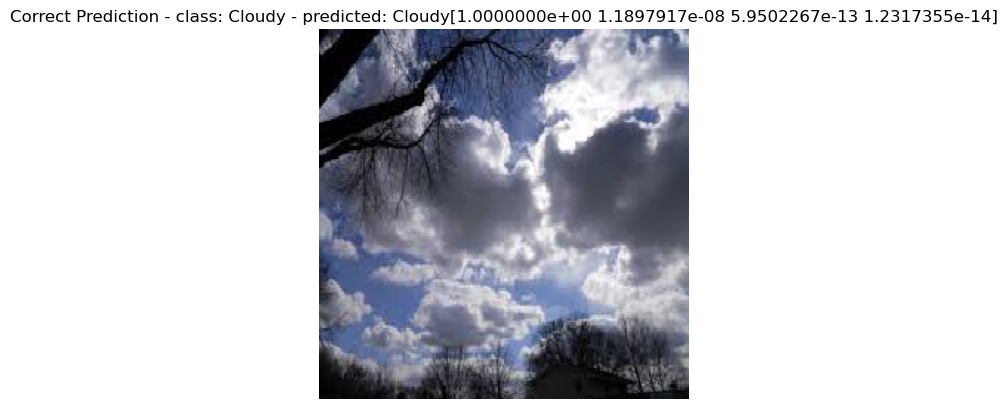

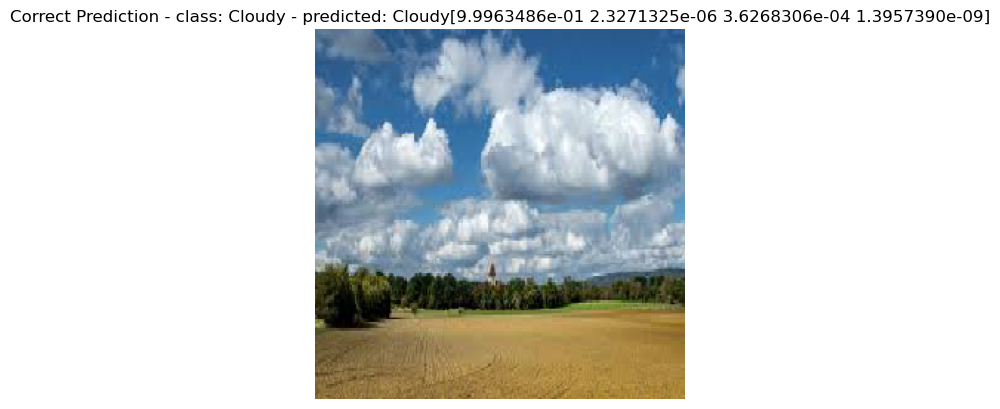

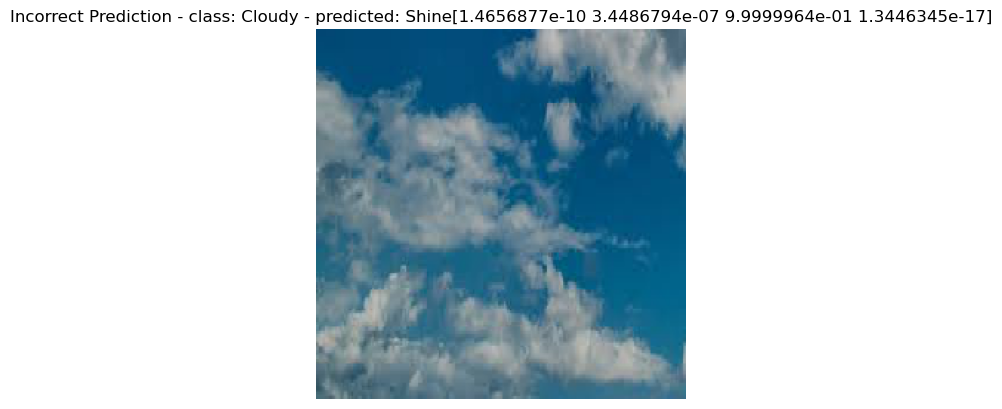

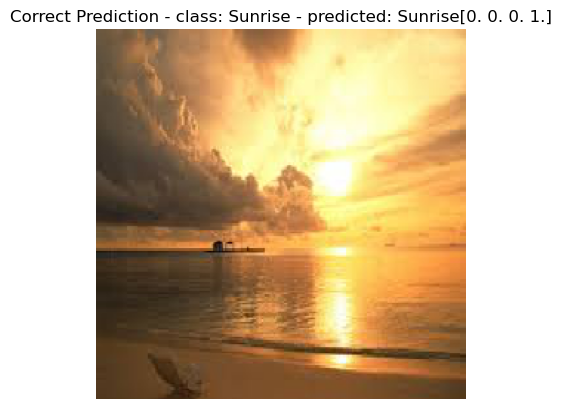

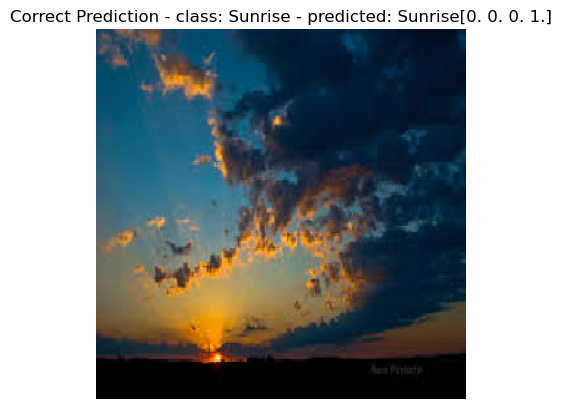

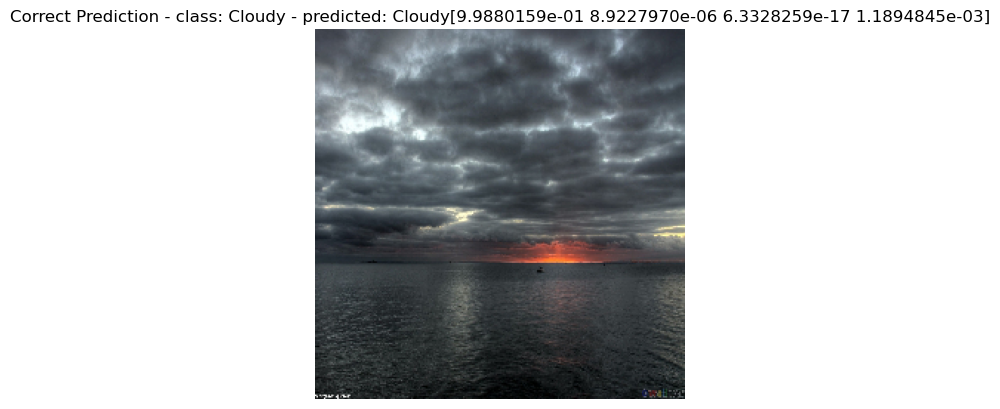

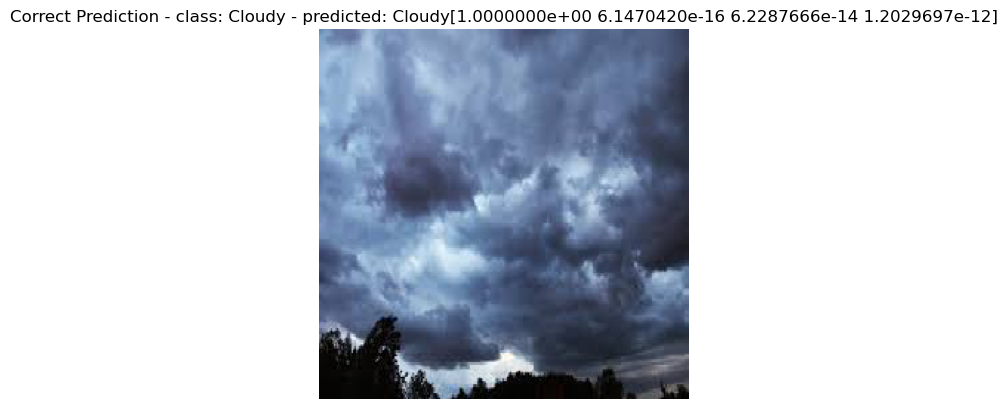

In [24]:
predict_one(model, 10) #<--you can show multiple pictures with this command. Just fill in the number you want to see.

### 5. Bonus Task

In [25]:
path = r'C:\Users\lisad\OneDrive\Homework\Machine Learning with Python\Achievement 2\Data Sets\My weather pics'

In [26]:
from PIL import Image

img = Image.open(os.path.join(path,'clouds.png'))
print(img.format)
print(img.size)
print(img.mode)

JPEG
(846, 846)
RGB


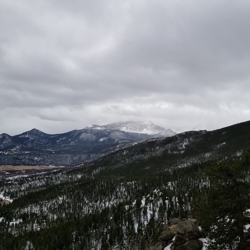

In [27]:
newsize = (250,250)
img2 = img.resize(newsize)
img2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


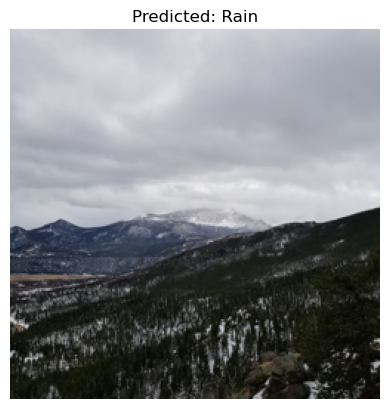

In [28]:
# Define the function to predict and display a single image

def predict_one(model, img2, class_names):
    # Convert the image to RGB (in case it's RGBA)
    img2_rgb = img2.convert('RGB')
    
    # Convert the image to a NumPy array and preprocess for the model
    img_array = np.array(img2_rgb)
    
    # Add batch dimension to the image, as models expect batches
    img_array = np.expand_dims(img_array, axis=0)
    
    # Predict the class
    predicted_batch = model.predict(img_array)
    
    # Since we have only one image, we'll deal with the first element
    predicted_class = class_names[np.argmax(predicted_batch[0])]
    value_predicted = predicted_batch[0]
    
    # Display the image and prediction
    plt.figure()
    plt.title(f'Predicted: {predicted_class}')
    plt.axis('off')
    plt.imshow(img2_rgb)
    plt.show()

# Call the function
predict_one(model, img2, class_names)

In [32]:
from PIL import Image

img = Image.open(os.path.join(path,'rain.png'))
print(img.format)
print(img.size)
print(img.mode)

JPEG
(846, 846)
RGB


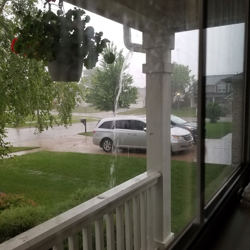

In [33]:
newsize = (250,250)
img3 = img.resize(newsize)
img3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


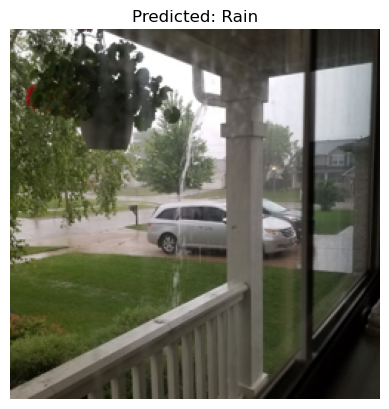

In [37]:
# Define the function to predict and display a single image

def predict_one(model, img3, class_names):
    # Convert the image to RGB (in case it's RGBA)
    img3_rgb = img3.convert('RGB')
    
    # Convert the image to a NumPy array and preprocess for the model
    img_array = np.array(img3_rgb)
    
    # Add batch dimension to the image, as models expect batches
    img_array = np.expand_dims(img_array, axis=0)
    
    # Predict the class
    predicted_batch = model.predict(img_array)
    
    # Since we have only one image, we'll deal with the first element
    predicted_class = class_names[np.argmax(predicted_batch[0])]
    value_predicted = predicted_batch[0]
    
    # Display the image and prediction
    plt.figure()
    plt.title(f'Predicted: {predicted_class}')
    plt.axis('off')
    plt.imshow(img3_rgb)
    plt.show()

# Call the function
predict_one(model, img3, class_names)

In [46]:
img = Image.open(os.path.join(path,'snow2.png'))
print(img.format)
print(img.size)
print(img.mode)

JPEG
(476, 846)
RGB


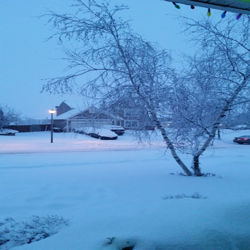

In [47]:
newsize = (250,250)
img4 = img.resize(newsize)
img4

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


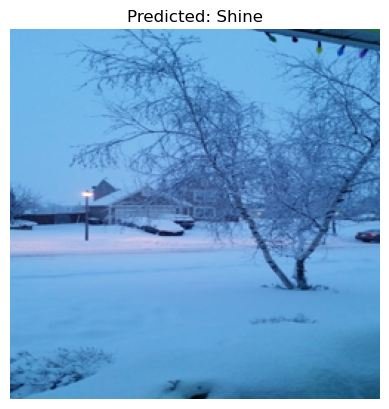

In [48]:
# Define the function to predict and display a single image

def predict_one(model, img4, class_names):
    # Convert the image to RGB (in case it's RGBA)
    img4_rgb = img4.convert('RGB')
    
    # Convert the image to a NumPy array and preprocess for the model
    img_array = np.array(img4_rgb)
    
    # Add batch dimension to the image, as models expect batches
    img_array = np.expand_dims(img_array, axis=0)
    
    # Predict the class
    predicted_batch = model.predict(img_array)
    
    # Since we have only one image, we'll deal with the first element
    predicted_class = class_names[np.argmax(predicted_batch[0])]
    value_predicted = predicted_batch[0]
    
    # Display the image and prediction
    plt.figure()
    plt.title(f'Predicted: {predicted_class}')
    plt.axis('off')
    plt.imshow(img4_rgb)
    plt.show()

# Call the function
predict_one(model, img4, class_names)

In [49]:
img = Image.open(os.path.join(path,'sun.png'))
print(img.format)
print(img.size)
print(img.mode)

JPEG
(476, 846)
RGB


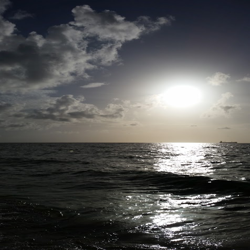

In [50]:
newsize = (250,250)
img5 = img.resize(newsize)
img5

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


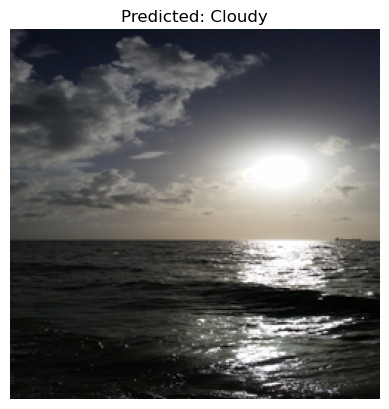

In [51]:
# Define the function to predict and display a single image

def predict_one(model, img5, class_names):
    # Convert the image to RGB (in case it's RGBA)
    img5_rgb = img5.convert('RGB')
    
    # Convert the image to a NumPy array and preprocess for the model
    img_array = np.array(img5_rgb)
    
    # Add batch dimension to the image, as models expect batches
    img_array = np.expand_dims(img_array, axis=0)
    
    # Predict the class
    predicted_batch = model.predict(img_array)
    
    # Since we have only one image, we'll deal with the first element
    predicted_class = class_names[np.argmax(predicted_batch[0])]
    value_predicted = predicted_batch[0]
    
    # Display the image and prediction
    plt.figure()
    plt.title(f'Predicted: {predicted_class}')
    plt.axis('off')
    plt.imshow(img5_rgb)
    plt.show()

# Call the function
predict_one(model, img5, class_names)